In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#read the dataset
file_path = r"D:\EXCELL\Diwali Sales Data.csv"
df = pd.read_csv(file_path, encoding = 'unicode_escape')

In [5]:
df.shape

(11229, 15)

In [6]:
df

,Unnamed: 0,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status
0,23,1001505.0,Gilcrest,P00271842,F,51-55,53.0,0.0,Uttar Pradesh,Central,Automobile,Auto,2.0,23515.0,Unmarried
1,24,1000900.0,Skaria,P00317842,M,55+,83.0,0.0,Karnataka,Southern,Automobile,Auto,3.0,23513.0,Unmarried
2,25,1005908.0,Eric,P00282642,F,26-35,33.0,0.0,Andhra Pradesh,Southern,IT Sector,Auto,3.0,23462.0,Unmarried
3,26,1001101.0,Gibson,P00234742,F,36-45,40.0,0.0,Uttar Pradesh,Central,Banking,Auto,3.0,23456.0,Unmarried
4,27,1004736.0,Mahima,P00058042,F,18-25,25.0,1.0,Andhra Pradesh,Southern,Banking,Auto,4.0,23451.0,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11224,11318,11001726.0,Abhijit,P00105042,F,26-35,30.0,0.0,Andhra Pradesh,Southern,Retail,Auto,4.0,23066.0,Unmarried
11225,11319,11001404.0,Vineet,P00141842,F,51-55,30.0,0.0,Andhra Pradesh,Southern,IT Sector,Auto,2.0,23053.0,Unmarried
11226,11326,11001389.0,Smriti,P00261542,F,26-35,33.0,1.0,Delhi,Central,Agriculture,Stationery,3.0,21463.0,Married
11227,11332,11001687.0,Bruce,P00265242,F,26-35,33.0,0.0,Maharashtra,Western,Govt,Stationery,4.0,21325.0,Unmarried


In [7]:
df.drop(['marraige_status'], axis=1, inplace=True)

In [8]:
df.columns

Index(['Unnamed: 0', 'User_ID', 'Cust_name', 'Product_ID', 'Gender',
       'Age Group', 'Age', 'Marital_Status', 'State', 'Zone', 'Occupation',
       'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [9]:
df.shape

(11229, 14)

In [10]:
df.isnull().sum()

Unnamed: 0          0
User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11229.000000,11229.000000,11229.000000
mean,35.428979,2.489269,9436.415566
std,12.749458,1.115041,5196.480173
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5442.000000
50%,33.000000,2.000000,8108.000000
75%,43.000000,3.000000,12668.000000
max,92.000000,4.000000,23515.000000


***EXPLORATORY DATA ANALYSIS***

*Gender*

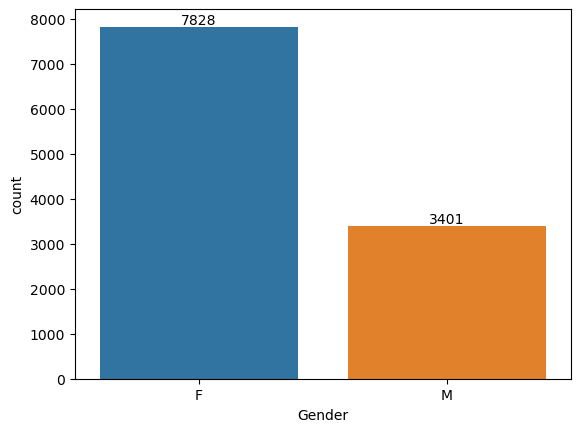

In [12]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [13]:
sales_gen=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

<Axes: xlabel='Gender', ylabel='Amount'>

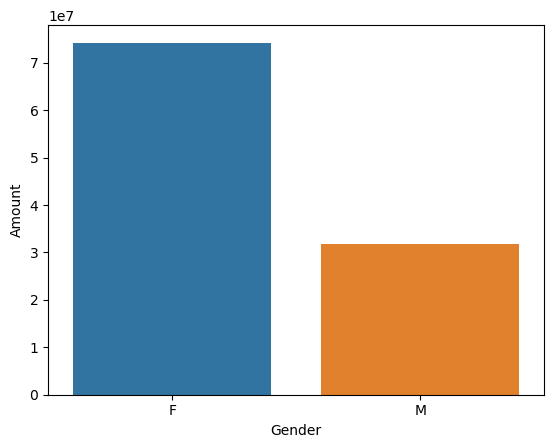

In [14]:
sns.barplot(x = 'Gender', y= 'Amount', data = sales_gen)

**Age**

In [15]:
df.columns

Index(['Unnamed: 0', 'User_ID', 'Cust_name', 'Product_ID', 'Gender',
       'Age Group', 'Age', 'Marital_Status', 'State', 'Zone', 'Occupation',
       'Product_Category', 'Orders', 'Amount'],
      dtype='object')

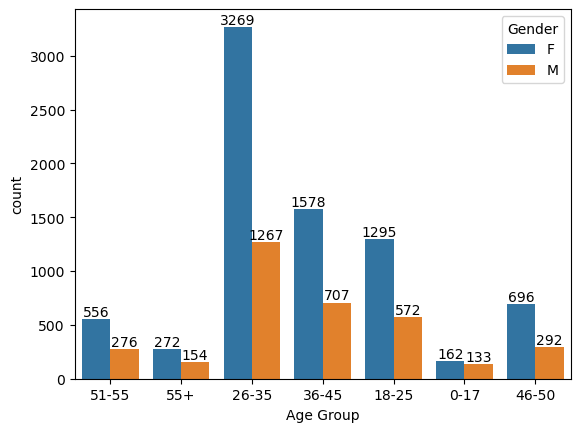

In [16]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender', orient='h')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Amount', ylabel='Age Group'>

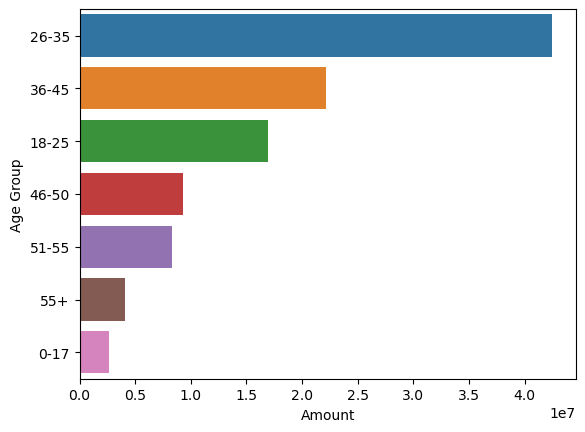

In [21]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Amount', y= 'Age Group', data = sales_age)

***STATE***

In [86]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

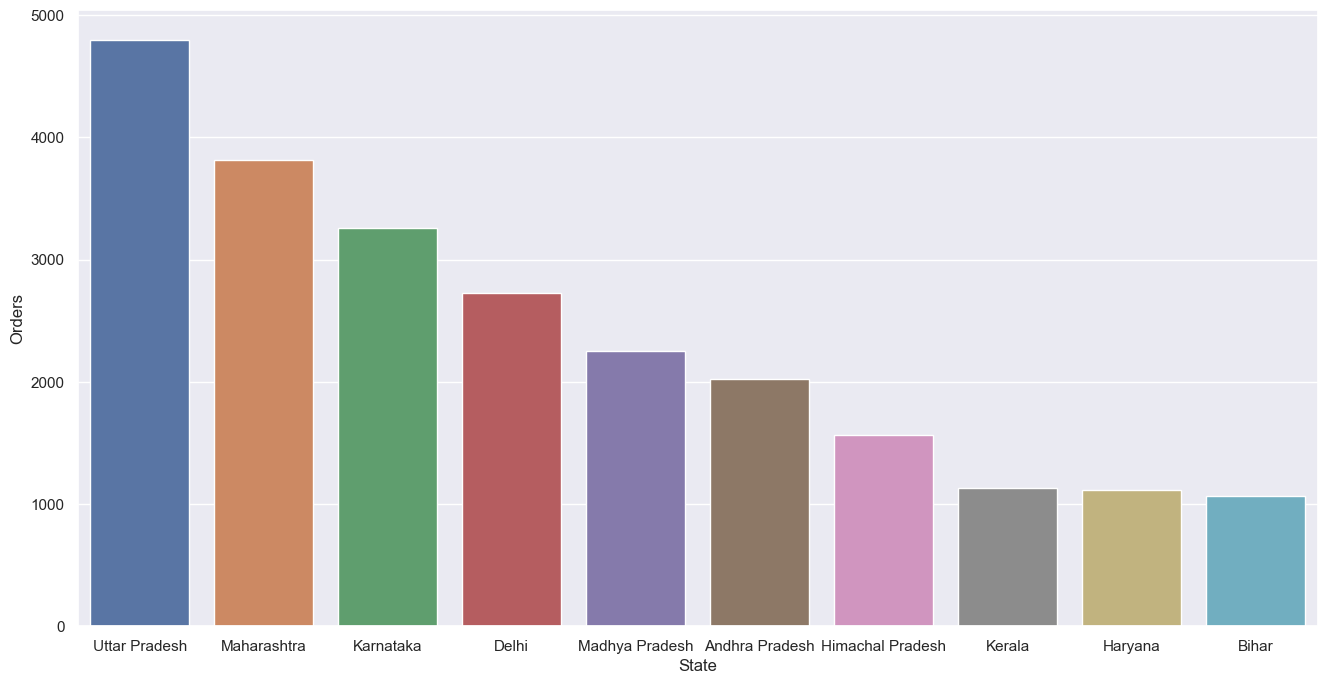

In [95]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,8)})
sns.barplot(data=sales_state, x = 'State', y='Orders')

#TOP5 OF STATES

<Axes: xlabel='State', ylabel='Orders'>

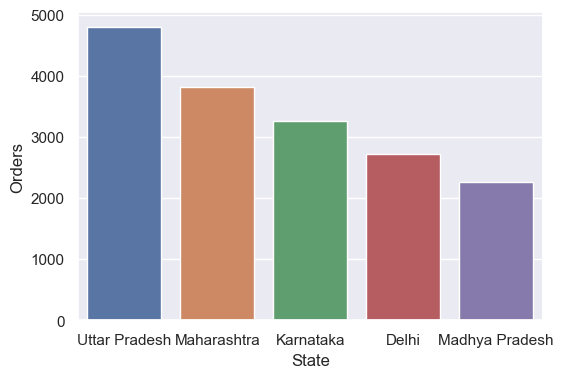

In [38]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)

sns.set(rc={'figure.figsize':(6,4)})
sns.barplot(data=sales_state, x = 'State', y='Orders')


<Axes: xlabel='Orders', ylabel='State'>

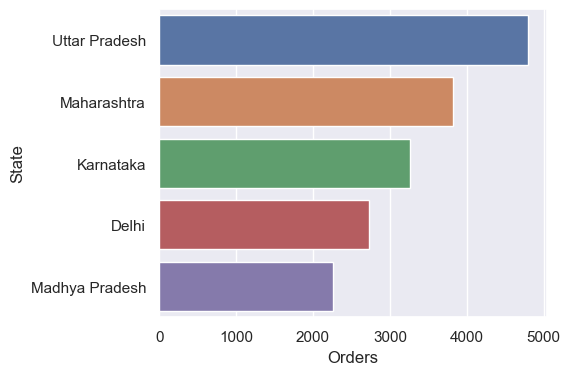

In [37]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)

sns.set(rc={'figure.figsize':(5,4)})
sns.barplot(data=sales_state, y = 'State', x='Orders')

<Axes: xlabel='State', ylabel='Amount'>

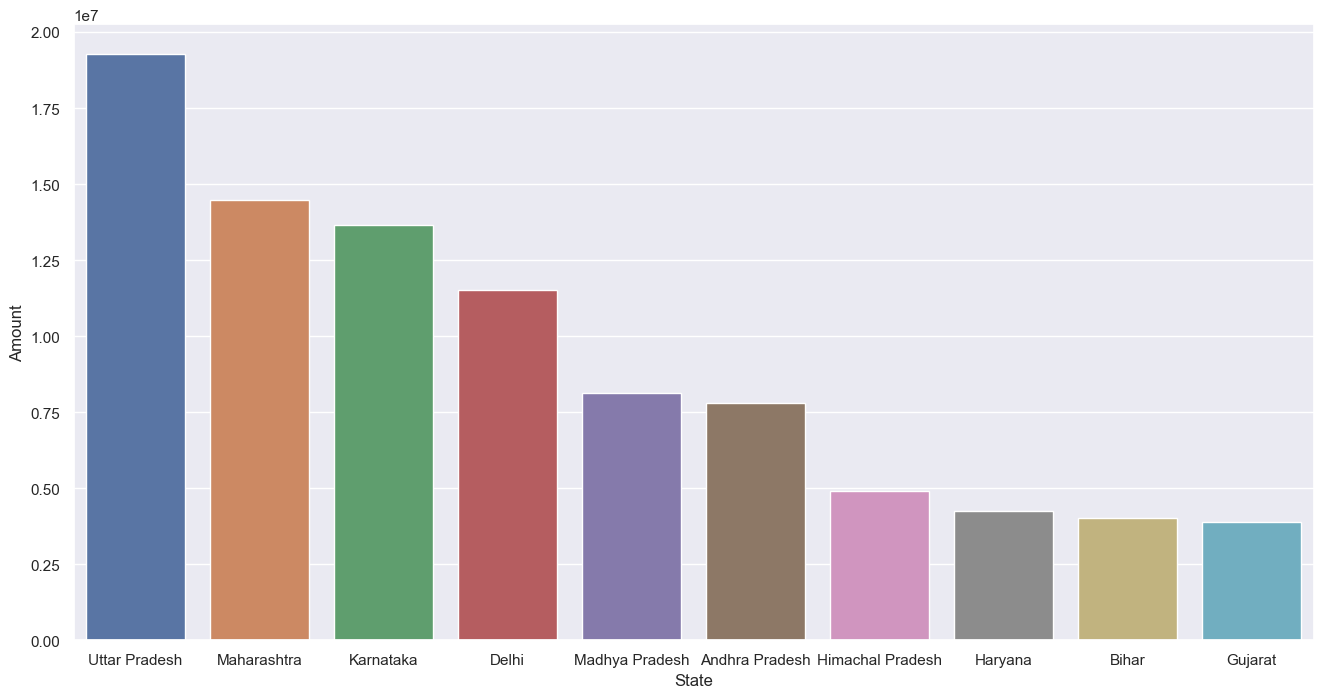

In [117]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,8)})
sns.barplot(data=sales_state, x = 'State', y='Amount')

**Marital status**

0.0=married, 1.0=unmarried

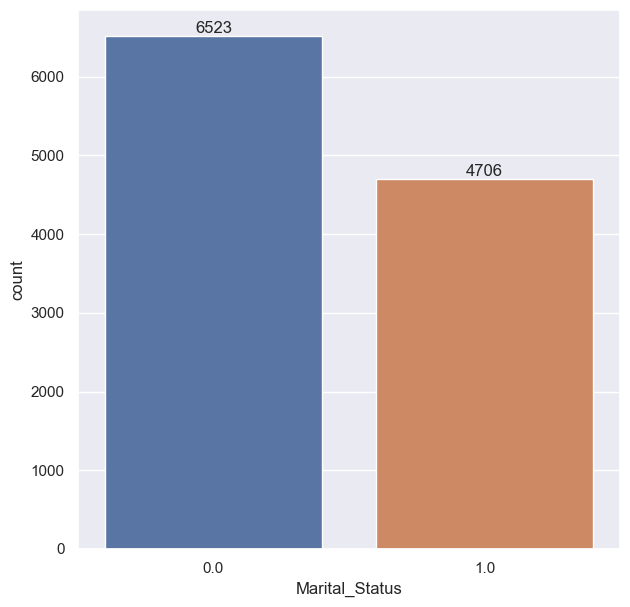

In [109]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,6)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

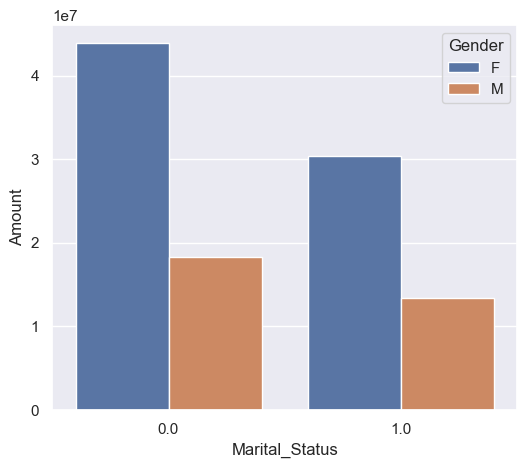

In [110]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=sales_state, x = 'Marital_Status', y='Amount',hue='Gender')

**Occupation**

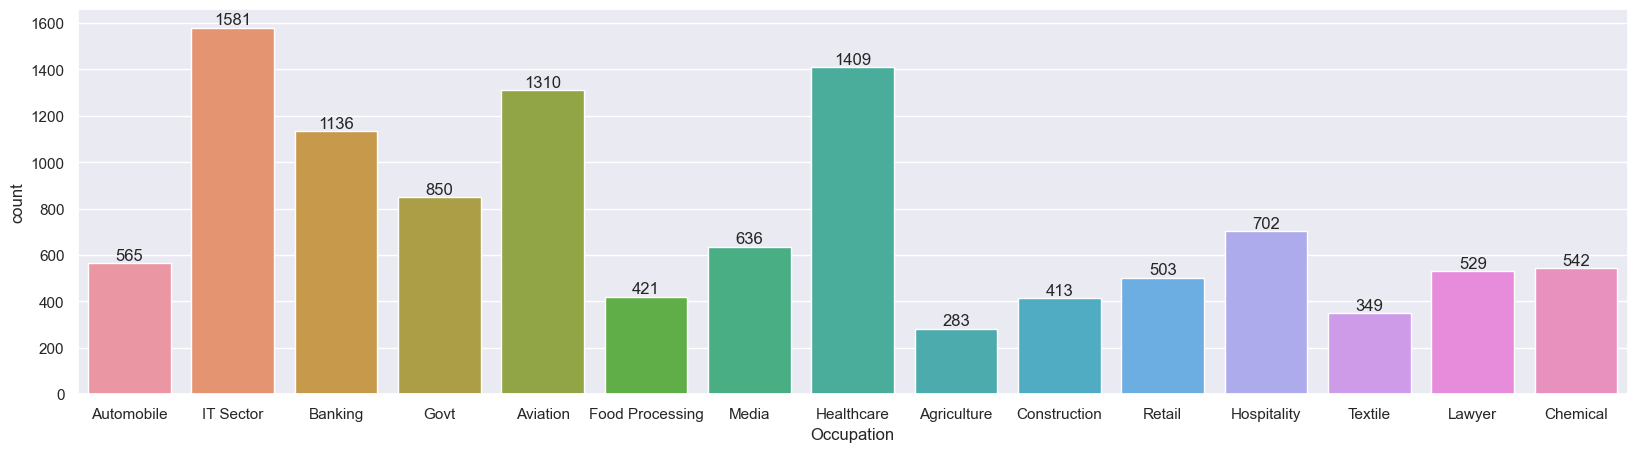

In [118]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Occupation', ylabel='Amount'>

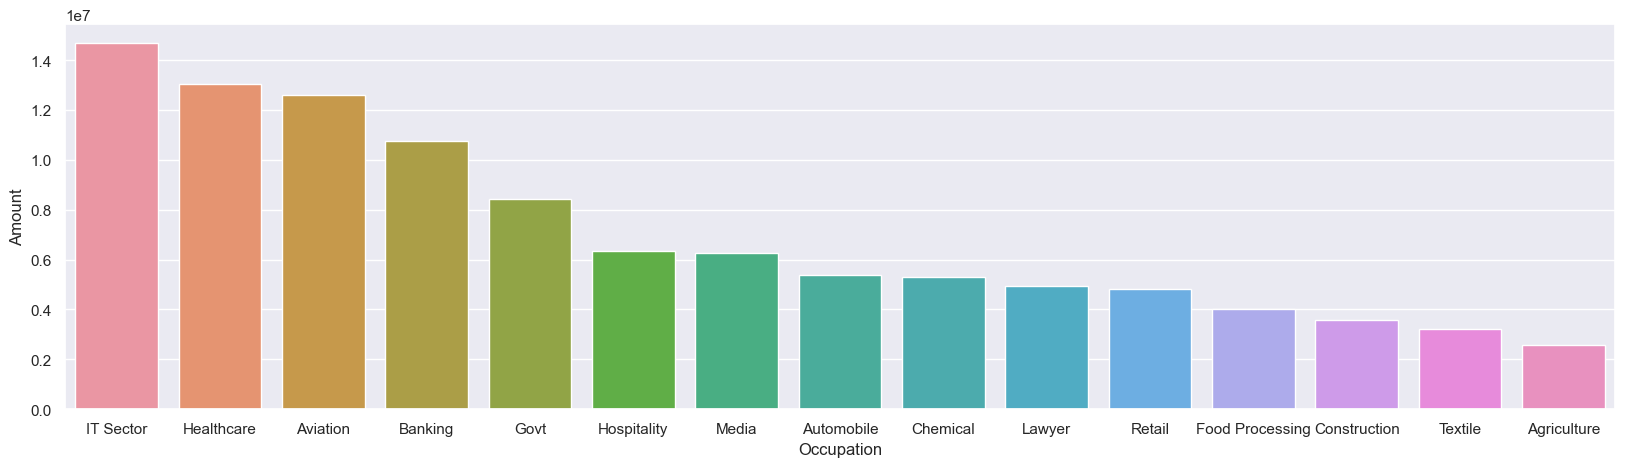

In [119]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x = 'Occupation', y='Amount')

<Axes: xlabel='Occupation', ylabel='Amount'>

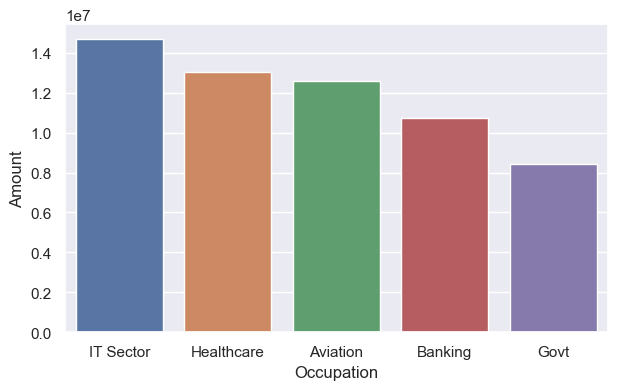

In [41]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(data=sales_state, x = 'Occupation', y='Amount')

<Axes: xlabel='Amount', ylabel='Occupation'>

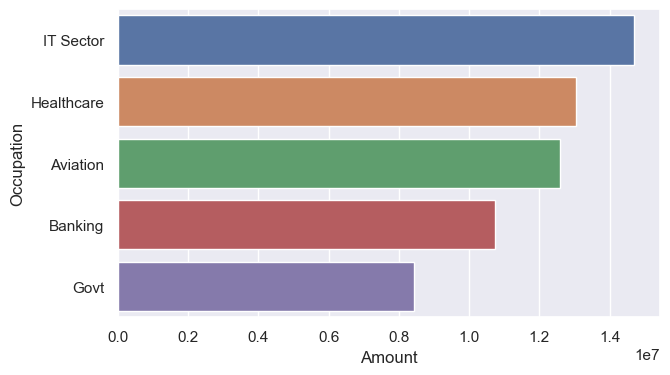

In [42]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(data=sales_state, y = 'Occupation', x='Amount')

**Product Category**

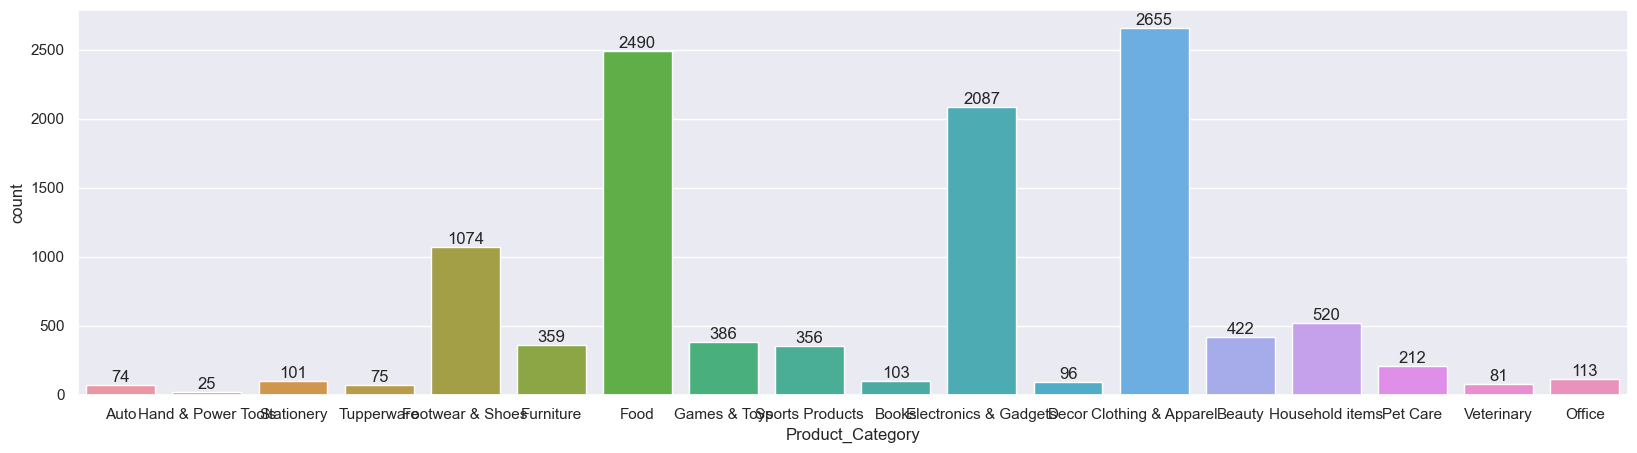

In [24]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category', orient = 'h')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

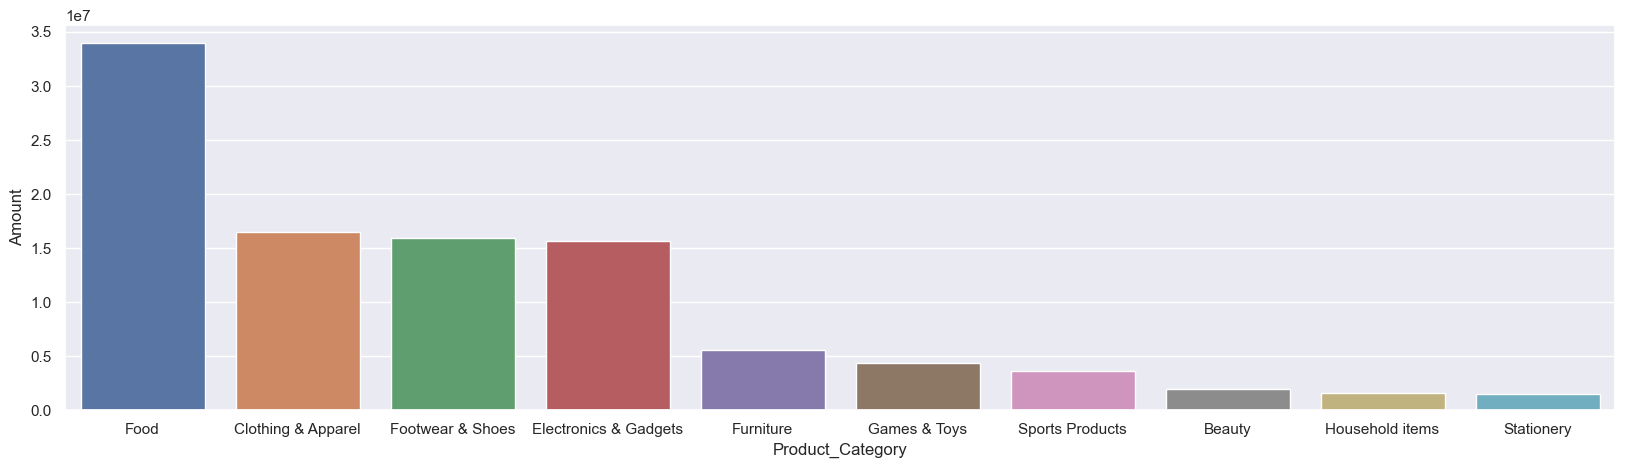

In [121]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x = 'Product_Category', y='Amount')

<Axes: xlabel='Product_Category', ylabel='Amount'>

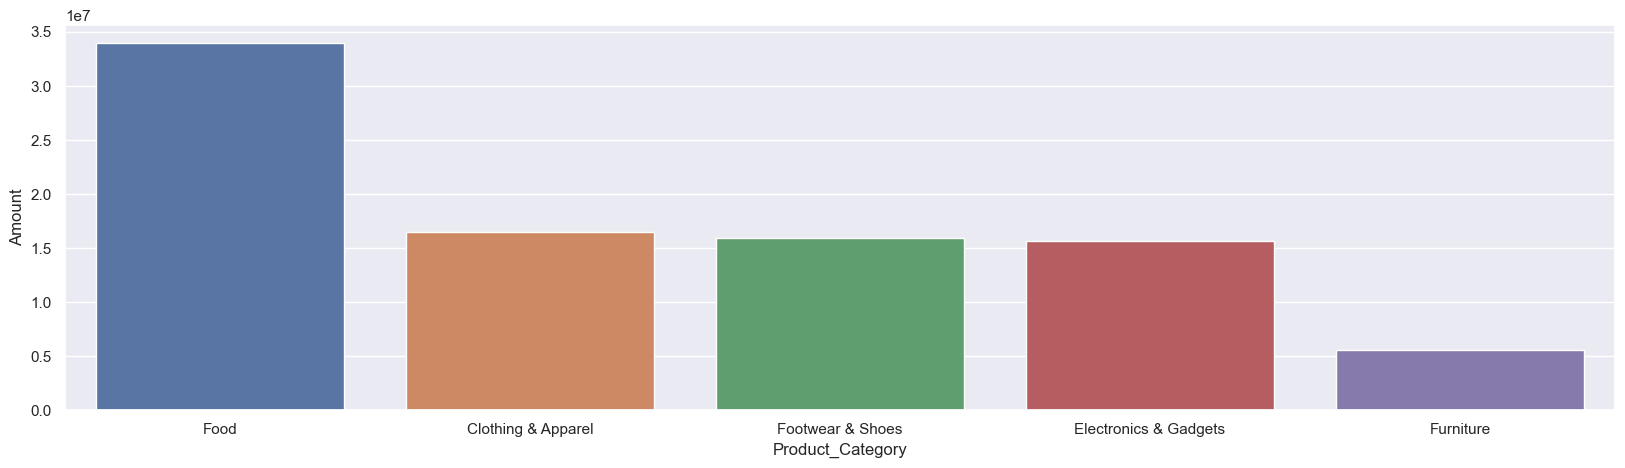

In [46]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x = 'Product_Category', y='Amount')

<Axes: xlabel='Amount', ylabel='Product_Category'>

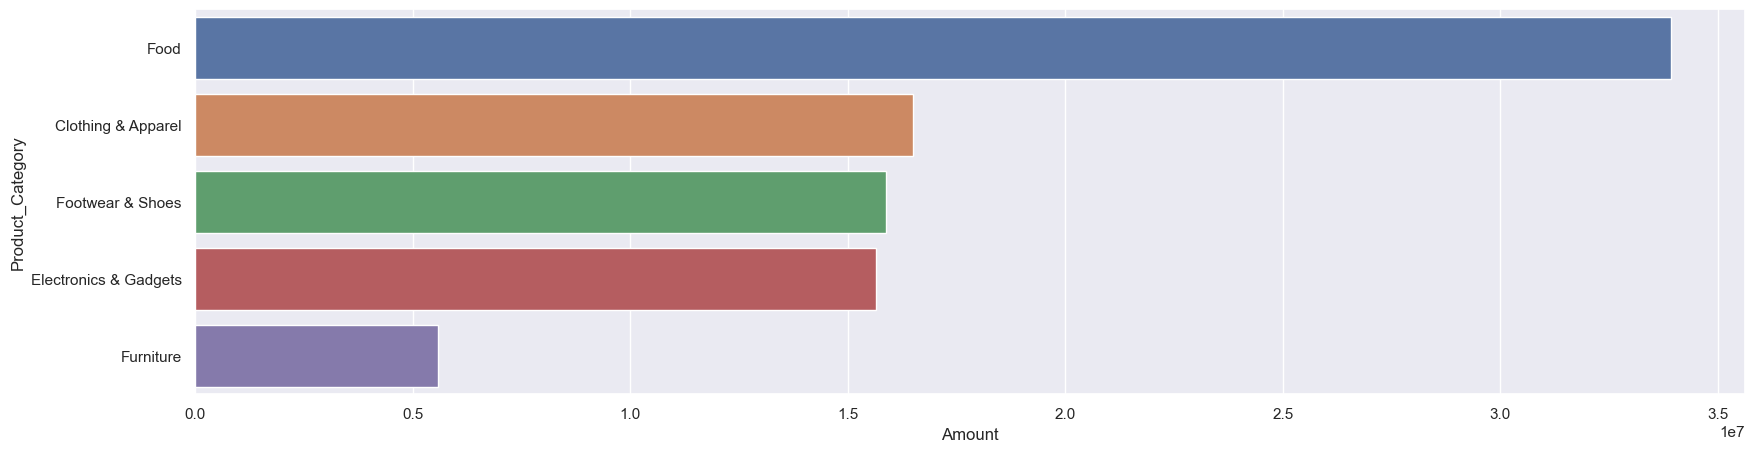

In [47]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, y = 'Product_Category', x='Amount')

**CONCLUSION**

***Age group of 26-35 yrs from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.***

1.**Females** generally places more order and their purchase power is also higher

2.Females and males of age group of **26-35** purchase more

3.married females purchased more than unmarried , whereas unmarried females are high in number

4.*Top 1* state of purchasing products is **UTTAR PRADESH**

5.Purchasers highly are from **IT SECTOR**, followed by **HEALTH CARE** and then **AVIATION**

6.**FOOD** is the highly purchased product,
followed by **CLOTHING & APPAREL**